<h1> Installing UnMasked AES on ChipWhisperer Board </h1>

In [1]:
import chipwhisperer as cw
from chipwhisperer.capture.api.programmers import STM32FProgrammer
import os

# Setup a connection with the CW board
# and fetch the scope for using this board.
scope = cw.scope()

# The default settings are fine for now.
scope.default_setup()

# Fetch the target from the scope
# This should be automatically connected
target = cw.target(scope)

# Initiate a new STM32F Program
# STM32 being the ARM microcontroller that we are using
program = STM32FProgrammer

# Manually specify the path to the firmware directory
# Adjust the path to where your firmware file is actually located
aes_firmware_dir = "D:\\Downloads\\Leiden University\\Crytpographic Engineering\\CR-A2\\CW STM-32 Firmware\\UnMasked"
aes_hex_path = os.path.join(aes_firmware_dir, "simpleserial-aes_CW308-STM32F3_MBEDTLS.hex")

# Apply the program to the actual target
# This allows us to run the hex code on the microcontroller
cw.program_target(scope, program, aes_hex_path)

# Disconnect the scope and target
scope.dis()
target.dis()


Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16007 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16007 bytes


In [2]:
import string
import random
import numpy as np
def random_string(length):
    # Define the alphabet of the random string
    # Here we take the lowercase latin alphabet in ascii encoding
    # e.g. "cpjsapcnrsdtjvlo", "btqfocsprbualtwt" or "yzkwewjbkpmriccx"
    alphabet = string.ascii_lowercase

    # Return a string with the given length with randomly chosen chars
    return ''.join(random.choice(alphabet) for i in range(length))


In [3]:
from tqdm import trange
import random
import string

# Function to generate random strings
def random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# Initialize scope and target
scope = cw.scope()
if scope is None:
    print("Scope is not initialized.")
    exit(1)
scope.default_setup()

target = cw.target(scope)
if target is None:
    print("Target is not initialized.")
    exit(1)

key_str = 'H4ck3rm4n-l33t42'
key = bytearray(key_str, 'ascii')
N = 100
textins = []
traces = []

for i in trange(N, desc="Capturing traces"):
    plain_text = bytearray(random_string(16), 'ascii')
    trace = cw.capture_trace(scope, target, plain_text, key)
    if trace is None:
        print("Capture failed; skipping trace.")
        continue

    textins.append(plain_text)
    traces.append(trace.wave)

# Disconnect scope and target
#scope.dis()
#target.dis()


Capturing traces: 100%|██████████| 100/100 [00:02<00:00, 36.21it/s]


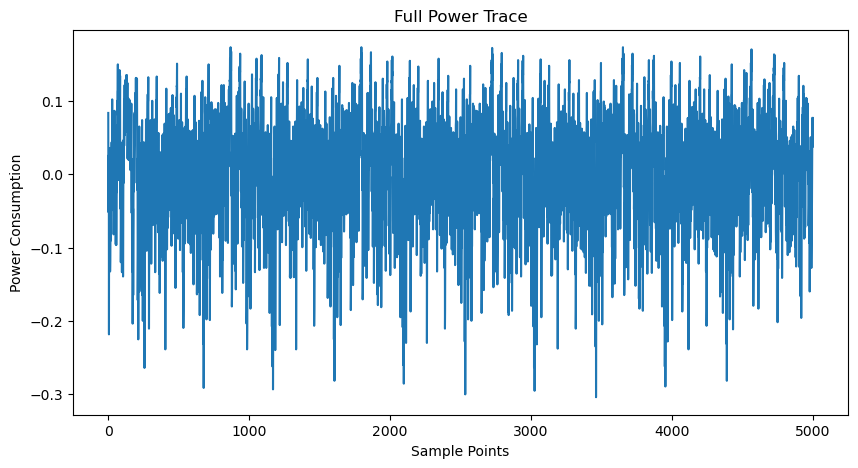

In [4]:
import matplotlib.pyplot as plt

# Define the key used for the encryption
# This key has to be 128 bits = 16 bytes
# = 16 ascii characters in length
key_str = 'H4ck3rm4n-l33t42'

# Convert the key to a byte array
key = bytearray(key_str, 'ascii')

# Define the plain text used
# This plain text has to be a multiple of
# 128 bits = 16 bytes = 16 ascii characters in length.
plain_text = bytearray('a' * 16, 'ascii')

# Capture the actual trace
trace = cw.capture_trace(scope, target, plain_text, key)

# Plot the full power trace
plt.figure(figsize=(10, 5))
plt.plot(trace.wave)
plt.title('Full Power Trace')
plt.xlabel('Sample Points')
plt.ylabel('Power Consumption')
plt.show()

# Disconnect the scope and target to free resources
scope.dis()
target.dis()


<h1> Installing Masked AES on ChipWhisperer Board </h1>

In [5]:
import chipwhisperer as cw
from chipwhisperer.capture.api.programmers import STM32FProgrammer
import os

# Setup a connection with the CW board
# and fetch the scope for using this board.
scope = cw.scope()

# The default settings are fine for now.
scope.default_setup()

# Fetch the target from the scope
# This should be automatically connected
target = cw.target(scope)

# Initiate a new STM32F Program
# STM32 being the ARM microcontroller that we are using
program = STM32FProgrammer

# Manually specify the path to the firmware directory
# Adjust the path to where your firmware file is actually located
aes_firmware_dir = "D:\\Downloads\\Leiden University\\Crytpographic Engineering\\CR-A2\\CW STM-32 Firmware\\Masked"
aes_hex_path = os.path.join(aes_firmware_dir, "simpleserial-aes_CW308-STM32F3_MASKEDAES_ANSSI.hex")

# Apply the program to the actual target
# This allows us to run the hex code on the microcontroller
cw.program_target(scope, program, aes_hex_path)

# Disconnect the scope and target
scope.dis()
target.dis()


Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11427 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11427 bytes


In [6]:
import string
import random
import numpy as np
def random_string(length):
    # Define the alphabet of the random string
    # Here we take the lowercase latin alphabet in ascii encoding
    # e.g. "cpjsapcnrsdtjvlo", "btqfocsprbualtwt" or "yzkwewjbkpmriccx"
    alphabet = string.ascii_lowercase

    # Return a string with the given length with randomly chosen chars
    return ''.join(random.choice(alphabet) for i in range(length))


In [7]:
from tqdm import trange
import random
import string

# Function to generate random strings
def random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# Initialize scope and target
scope = cw.scope()
if scope is None:
    print("Scope is not initialized.")
    exit(1)
scope.default_setup()

target = cw.target(scope)
if target is None:
    print("Target is not initialized.")
    exit(1)

key_str = 'H4ck3rm4n-l33t42'
key = bytearray(key_str, 'ascii')
N = 100
textins = []
traces = []

for i in trange(N, desc="Capturing traces"):
    plain_text = bytearray(random_string(16), 'ascii')
    trace = cw.capture_trace(scope, target, plain_text, key)
    if trace is None:
        print("Capture failed; skipping trace.")
        continue

    textins.append(plain_text)
    traces.append(trace.wave)

# Disconnect scope and target
#scope.dis()
#target.dis()


Capturing traces: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s]


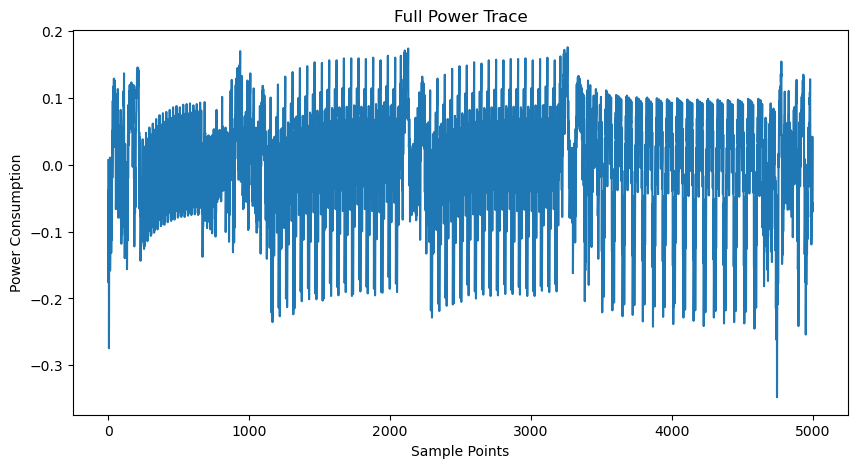

In [8]:
import matplotlib.pyplot as plt

# Define the key used for the encryption
# This key has to be 128 bits = 16 bytes
# = 16 ascii characters in length
key_str = 'H4ck3rm4n-l33t42'

# Convert the key to a byte array
key = bytearray(key_str, 'ascii')

# Define the plain text used
# This plain text has to be a multiple of
# 128 bits = 16 bytes = 16 ascii characters in length.
plain_text = bytearray('a' * 16, 'ascii')

# Capture the actual trace
trace = cw.capture_trace(scope, target, plain_text, key)

# Plot the full power trace
plt.figure(figsize=(10, 5))
plt.plot(trace.wave)
plt.title('Full Power Trace')
plt.xlabel('Sample Points')
plt.ylabel('Power Consumption')
plt.show()

<h1> Preparing the Dataset </h1>

In [2]:
!wget https://files.data.gouv.fr/anssi/ascadv2/ascadv2-extracted.h5

--2024-05-13 11:15:52--  https://files.data.gouv.fr/anssi/ascadv2/ascadv2-extracted.h5
Resolving files.data.gouv.fr (files.data.gouv.fr)... 51.38.54.240
Connecting to files.data.gouv.fr (files.data.gouv.fr)|51.38.54.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7713246656 (7.2G) [application/octet-stream]
Saving to: ‘ascadv2-extracted.h5’

ascadv2-extracted.h   0%[                    ]  54.95M  5.25MB/s    eta 24m 40s^C


In [3]:
# Clone data at https://github.com/ANSSI-FR/ASCAD
DATA_FILE = "ascadv2-extracted.h5"

import os ; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import absl.logging ; absl.logging.set_verbosity(absl.logging.ERROR)
from random import shuffle
from functools import partial
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow import TensorSpec, convert_to_tensor, expand_dims, float32, int8
from tensorflow.data import AUTOTUNE, Dataset
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, AveragePooling1D, BatchNormalization, \
    Conv1D, Dense, Flatten, Input, MaxPooling1D, add
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
print(f"Tensorflow version {tf.__version__} with Keras version {tf.keras.__version__}")
# Python generator to yield samples of training data
def generate_data(h5_data, mode):
    traces  = np.array(h5_data['traces'])
    labels  = np.array(h5_data['labels'])
    alpha   = [to_categorical(labels['alpha_mask'], num_classes=256)]
    beta    = [to_categorical(labels['beta_mask'], num_classes=256)]
    sboxes  = [to_categorical(labels['sbox_masked'][:,i], 256) for i in range(16)]
    perms   = [to_categorical(labels['perm_index'][:,i], 16) for i in range(16)]
    targets = alpha + beta + sboxes + perms  # 34 separate targets per trace
    if mode == "train": indices = [i for i in range(int(len(traces)*0.90))]  # 90% train
    else: indices = [int(len(traces)*0.90)+i for i in range(int(len(traces)*0.10))]
    shuffle(indices)
    for index in indices:  # Yield one trace and one [targets] in random order
        yield expand_dims(convert_to_tensor(traces[index]), -1), \
            tuple([convert_to_tensor(targets[i][index]) for i in range(len(targets))])


# Load the data; we are constrained to strictly profiling/training data for now 
data_file = h5py.File(DATA_FILE, "r")
profiling_data = data_file['Profiling_traces']


# Connect Python generators to Tensorflow datasets to feed model training
train_data = Dataset.from_generator(partial(generate_data, profiling_data, "train"),
                                    output_signature=((TensorSpec(shape=(15000, 1), dtype=int8),
                                                       tuple([TensorSpec(shape=(256), dtype=float32) for i in range(18)] +
                                                             [TensorSpec(shape=(16),  dtype=float32) for i in range(16)]
                                                             )))).cache().batch(64).prefetch(AUTOTUNE)

valid_data = Dataset.from_generator(partial(generate_data, profiling_data, "valid"),
                                    output_signature=((TensorSpec(shape=(15000, 1), dtype=int8),
                                                       tuple([TensorSpec(shape=(256), dtype=float32) for i in range(18)] +
                                                             [TensorSpec(shape=(16),  dtype=float32) for i in range(16)]
                                                             )))).cache().batch(64).prefetch(AUTOTUNE)

Tensorflow version 2.16.1 with Keras version 3.3.3


<h2> Sample Plot </h2>

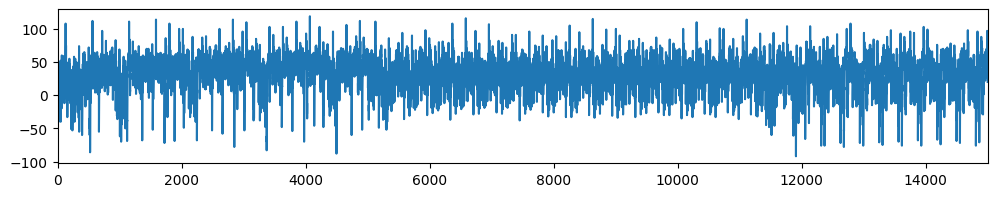

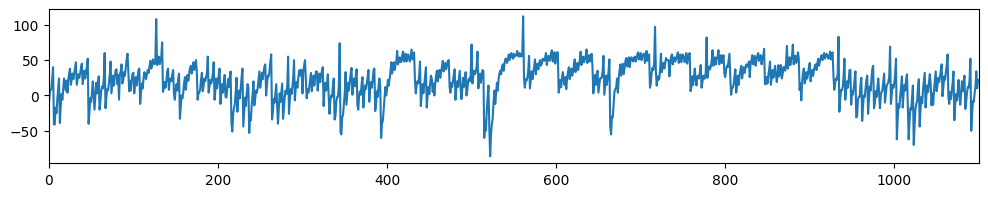

In [3]:
for sample in train_data:
    fig = plt.figure(figsize=(12, 2))
    plt.plot(sample[0][0]); plt.xlim(0, 15000)
    fig = plt.figure(figsize=(12, 2))
    plt.plot(sample[0][0][0:1100]) ; plt.xlim(0, 1100)
    break  

<h1> Building and Training the model </h1>

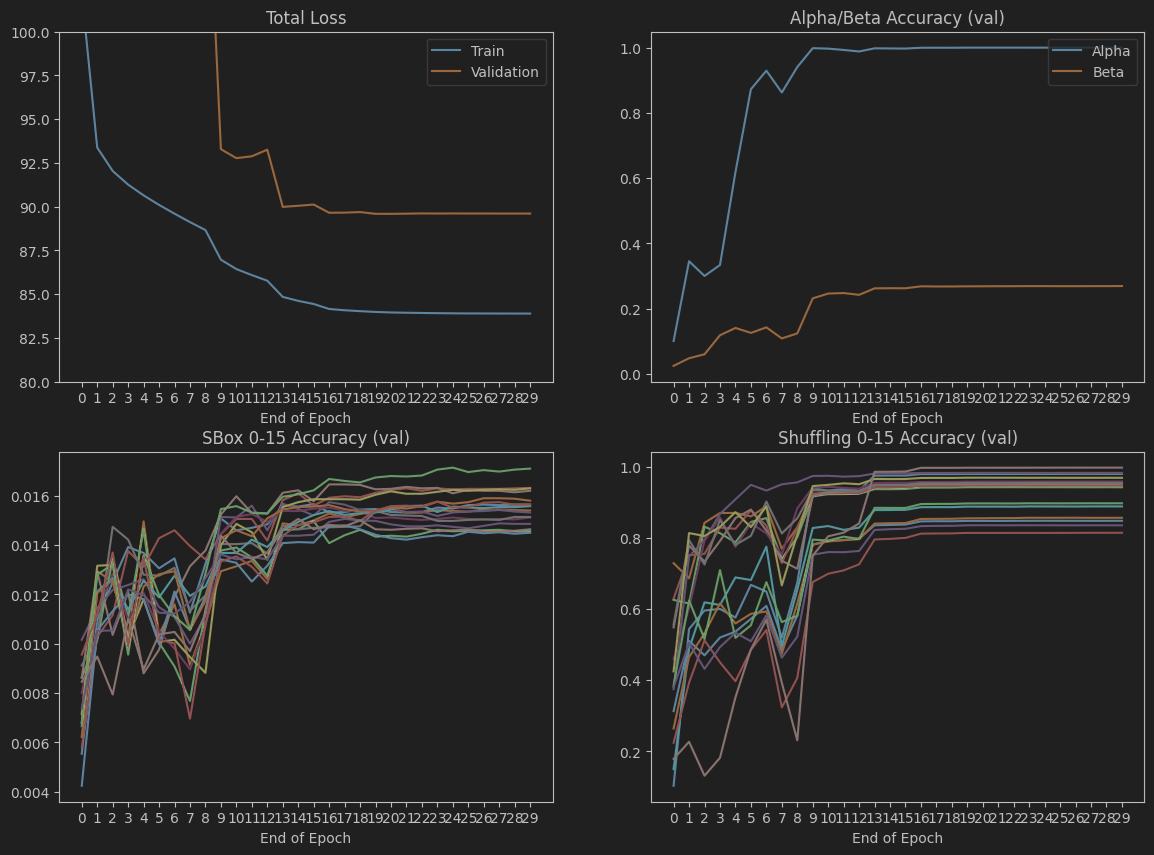

In [3]:
# Resnet layer sub-function
def resnet_layer(inputs, num_filters=16, k_size=11, strides=1,
                 activation='relu', batch_norm=True):
    x = inputs
    x = Conv1D(num_filters, kernel_size=k_size, strides=strides, padding='same')(x)
    if batch_norm: x = BatchNormalization()(x)
    if activation is not None: x = Activation(activation)(x)
    return x


# Output block sub-function for alpha, beta, sboxes and perms
def output_block(inputs, name, width):
    x = inputs
    x = Dense(1024, activation='relu', name=f'fc1_{name}')(x)
    x = BatchNormalization()(x)
    x = Dense(width, activation="softmax", name=f'{name}_output')(x)
    return x

# Build the complete 'ResNetSCA' model
def build_model():
    num_filters = 16; strides = 1  # Starting condition
    inputs = Input(shape=(15000,1))
    x = resnet_layer(inputs=inputs)
    for stack in range(9):
        if stack > 0: strides = 2
        y = resnet_layer(inputs=x, num_filters=num_filters, strides=strides)
        y = resnet_layer(inputs=y, num_filters=num_filters, activation=None)
        if stack > 0: x = resnet_layer(inputs=x, num_filters=num_filters, k_size=1,
                                       strides=strides, activation=None, batch_norm=False)
        x = add([x, y])
        x = Activation('relu')(x)
        if (num_filters<256): num_filters *= 2
    x = AveragePooling1D(pool_size=4)(x)
    x = Flatten()(x)

    # Total of 34-hot out of 4864 output bits...
    x_alpha = output_block(x, "alpha", 256)
    x_beta = output_block(x, "beta", 256)
    x_sboxes = [output_block(x, f"sbox_{i:02}", 256) for i in range(16)]
    x_perms = [output_block(x, f"perm_{i:02}", 16) for i in range(16)]

    return Model(inputs, [x_alpha, x_beta] + x_sboxes + x_perms, name='ResNetSCA')

# Plot the training history
def plot_history(hist):
    plt.figure(figsize=(14, 10)); xticks = range(0,len(hist.history["loss"]))
    ax = plt.subplot(2, 2, 1); plt.title("Total Loss")
    plt.plot(hist.history["loss"]); plt.plot(hist.history["val_loss"])
    plt.legend(["Train", "Validation"], loc="upper right"); plt.ylim(80, 100)
    plt.xlabel("End of Epoch"); plt.xticks(xticks)
    ax = plt.subplot(2, 2, 2); plt.title("Alpha/Beta Accuracy (val)")
    plt.plot(hist.history["val_alpha_output_accuracy"])
    plt.plot(hist.history["val_beta_output_accuracy"])
    plt.legend(["Alpha", "Beta"], loc="upper right")
    plt.xlabel("End of Epoch"); plt.xticks(xticks)
    ax = plt.subplot(2, 2, 3); plt.title("SBox 0-15 Accuracy (val)")
    for i in range(16): plt.plot(hist.history[f"val_sbox_{i:02}_output_accuracy"])
    plt.xlabel("End of Epoch"); plt.xticks(xticks)
    ax = plt.subplot(2, 2, 4); plt.title("Shuffling 0-15 Accuracy (val)")
    for i in range(16): plt.plot(hist.history[f"val_perm_{i:02}_output_accuracy"])
    plt.xlabel("End of Epoch"); plt.xticks(xticks)
    plt.show()


# Build and train the model
def train_model():
    model = build_model()
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-3), metrics=['accuracy'])
    callbacks = [ReduceLROnPlateau(factor=0.25, patience=2, verbose=0)]
    callbacks.append(ModelCheckpoint("model_checkpoint", save_best_only=True, verbose=0))
    history = model.fit(train_data, validation_data=valid_data, epochs=30, callbacks=callbacks, verbose=0)
    return history, model


history, model = train_model()
print(f"{np.sum([np.prod(v.shape) for v in model.trainable_variables])} total trainable parameters")
plot_history(history)

<h1> Using the Machine Learning Model to find out the keys </h1>

In [4]:
model_path = "trained_model.h5"
model = tf.keras.models.load_model(model_path)

# Now that training is complete, we can retrieve the attack data
attack_X = np.array(data_file['Attack_traces/traces'], dtype=np.int8)
attack_meta = data_file['Attack_traces/metadata']

# Make raw predictions from raw attack data
input_data = tf.expand_dims(attack_X[:110, :], -1)
predictions = model.predict(input_data, verbose=0)

# Extract the 34 predictions: alpha, beta, 16x alpha*sbox+beta, and 16x perm
preds_alpha = predictions[0]
preds_beta = predictions[1]
preds_unshuffSboxMulAdd = [predictions[2+i] for i in range(16)]
preds_shuff = [predictions[2+16+i] for i in range(16)]

In [5]:
# Addition in polynomial GF(2^8)
def addGF256(augend, addend):
    sum = augend ^ addend
    return sum


# Multiplication in GF(2^8) modulo the irreducible polynomial x^8 + x^4 + x^3 + x + 1
def mulGF256(multiplier, multiplicand):
    irreducible = 0b100011011
    product = 0
    for i in range(8):
        product = product << 1
        if product & 0b100000000: product = addGF256(product, irreducible)
        if multiplicand & 0b010000000: product = addGF256(product, multiplier)
        multiplicand = multiplicand << 1
    return product


# The AES SBox lookup table that we will use to compute the rank
AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])


# Given Pr(operation(before, operand) | t) and Pr(operand | t), compute Pr(before | t) 
# E.g., given Pr(Sbox(p^k)*alpha|t) and Pr(alpha), compute Pr(Sbox(p^k))
def remove_operation(before, operand, operation):
    after = np.zeros(before.shape)
    for j in range(256):
        before_rearranged = before[:, [operation(i, j) for i in range(256)]]
        after[:,j] = np.sum(before_rearranged*operand, axis=1)
    return after

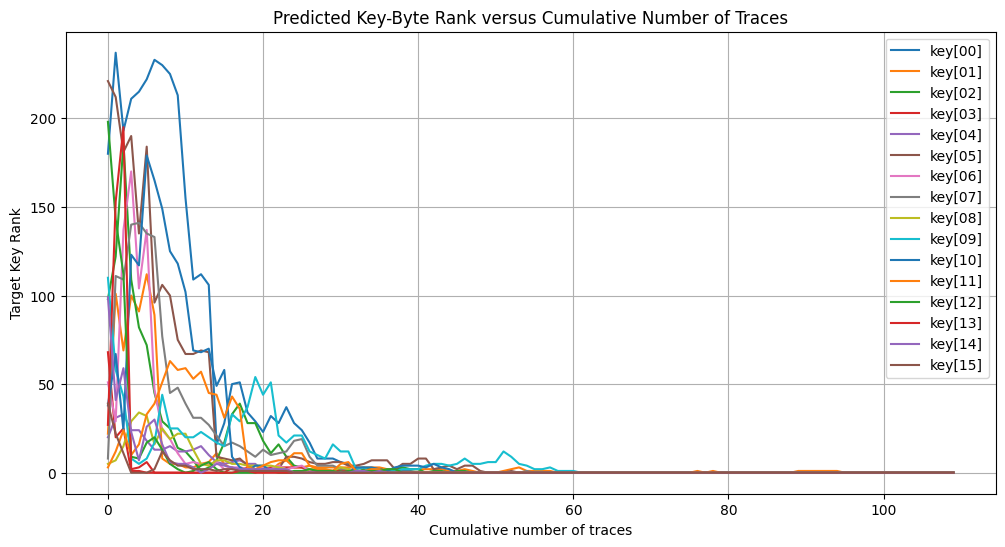

In [6]:
# Remove the GF256 addition of beta
preds_unshuffSboxMul = [remove_operation(x, preds_beta, addGF256) for x in preds_unshuffSboxMulAdd]

# Remove the GF256 mul of alpha
preds_unshuffSbox = [remove_operation(x, preds_alpha, mulGF256) for x in preds_unshuffSboxMul]

# Helper funtion to remove shuffling
def remove_shuff(prob_x, prob_shuff, j):
    prob = np.zeros((prob_x.shape[1], prob_x.shape[2]))
    for s in range(prob_x.shape[2]):
        prob_1 = prob_x[:,:,s]
        prob_2 = prob_shuff[:,:,j]
        prob[:,s] = np.sum(prob_1*prob_2, axis=0)
    return prob


# Remove the sbox permutations
preds_sbox = [remove_shuff(np.array(preds_unshuffSbox), np.array(preds_shuff), x) for x in range(16)]

def full_rank(predictions, metadata, target_byte):
    full_rank = []
    key_bytes_prob = np.zeros(256)
    for trace_index in range(predictions.shape[0]):
        plaintext = metadata[trace_index]['plaintext'][target_byte]
        key = metadata[trace_index]['key'][target_byte]
        for i in range(0, 256):
            prob = predictions[trace_index][AES_Sbox[plaintext ^ key ^ i]]
            key_bytes_prob[i] += np.log(prob + 1e-6)  # Add 1e-6 to avoid -inf
        real_key_rank = key_bytes_prob.argsort()[::-1].argsort()[0]  # Find rank
        full_rank.append(real_key_rank)
    return full_rank


# Plot final key ranking results
fig = plt.figure(figsize=(12, 6))
for target_byte in range(16):
    rank_i = full_rank(preds_sbox[target_byte], attack_meta, target_byte)
    plt.plot(rank_i, label=f"key[{target_byte:02}]")
plt.title('Predicted Key-Byte Rank versus Cumulative Number of Traces')
plt.xlabel('Cumulative number of traces'); plt.ylabel('Target Key Rank')
plt.grid(True); plt.legend(loc='upper right')
plt.show()